## EJERCICIO 2

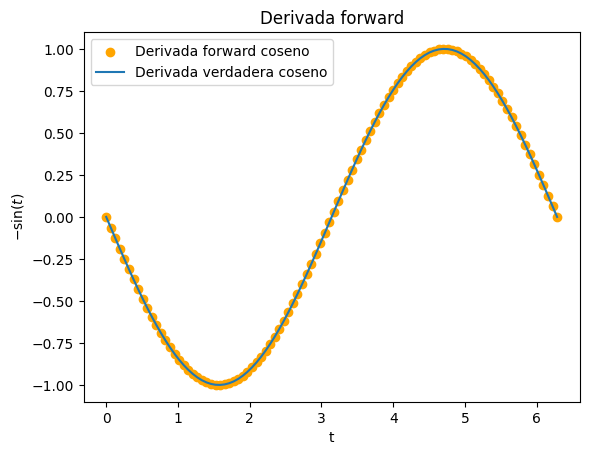

In [114]:
##EJERCICIO 2 E) 
'''PARTE 1- CALCULO DE DERIVADAS
IMPORTAMOS LAS LIBRERIAS QUE NOS VAN A SER UTILES'''
import numpy
from numpy import *
import matplotlib.pyplot as plt
'''DEFINIMOS LA FUNCION EVALUAR EN LA FUNCION CON LA QUE VAMOS A TRABAJAR'''
def evaluar_coseno(t):
    f=cos(t)
    return f
'''Y EN SU DERIVADA'''
def evaluar__menos_seno(t):
    f= -sin(t)
    return f
'''AHORA SI, EXPONEMOS EL CODIGO DE LA DERIVADA FORWARD'''
def derivada_forward(t,f):
    '''INICIALIZAMOS UNA LISTA QUE SERA NUESTRA DERIVADA'''
    derivada=[]
    '''h ES EL SALTO DE UN VECTOR QUE SUPONEMOS EQUIESPACIADO '''
    h=t[1]-t[0]
    '''EXTENDEMOS NUESTRO VECTOR DE DERIVADAS, MIRAR .TEX PARA RAZONAMIENTO'''
    f=concatenate((f,array([f[1],f[2],f[3]])))
    t=concatenate((t,array([t[1],t[2],t[3]])))
    
    '''OBTENEMOS EL VECTOR DERIVADA MOVIENDONOS CON UN FOR'''
    for i in range (0,len(t)-3):
        derivada.append((-11/6*f[i]+3*f[i+1]-1.5*f[i+2]+1/3*f[i+3])/h)

    '''EXTRAEMOS EL VECTOR DERIVADA'''
    return derivada
def main():
    '''CREAMOS NUESTRO VECTOR TEMPORAL Y SU CORRESPONDIENTE IMAGEN'''
    t=linspace(0,2*pi,100)
    f=evaluar_coseno(t)
    '''CREAMOS UN VECTOR DE LA MISMA LONGITUD CON LA DERIVADA VERDADERA'''
    derivada_v=evaluar__menos_seno(t)
    '''EJECUTAMOS LA FUNCION DERIVADA FORWARD'''
    derivada=derivada_forward(t,f)
    '''PLOTEAMOS AMBAS FUNCIONES PARA COMPARARLAS'''
    plt.scatter(t,derivada,label='Derivada forward coseno',color='orange')
    plt.plot(t,derivada_v,label='Derivada verdadera coseno')
    plt.legend()
    plt.xlabel('t')
    plt.ylabel('$-\sin(t)$')
    plt.title('Derivada forward')
    plt.show()
if __name__ == '__main__':
	main()
  
    

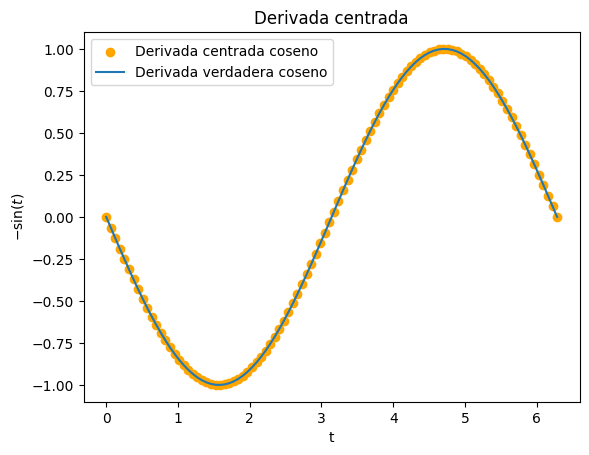

In [115]:
def derivada_centrada(t,f):
    derivada=[]
    h=t[1]-t[0]
    '''EXTENDEMOS NUESTROS VECTORES POR DELANTE Y DETRAS PARA PODER DERIVAR'''
    f=concatenate((array([f[-3],f[-2]]),f,array([f[1],f[2]])))
    t=concatenate((array([t[-3],t[-2]]),t,array([t[1],t[2]])))
    for i in range (2,len(t)-2):
        derivada.append((1/12*f[i-2]-2/3*f[i-1]+2/3*f[i+1]-1/12*f[i+2])/h)  
    return derivada
def main():
    t=linspace(0,2*pi,100)
    f=evaluar_coseno(t)
    derivada_v=evaluar__menos_seno(t)
    derivada=derivada_centrada(t,f)
    plt.scatter(t,derivada,label='Derivada centrada coseno',color='orange')
    plt.plot(t,derivada_v,label='Derivada verdadera coseno')
    plt.legend()
    plt.xlabel('t')
    plt.ylabel('$-\sin(t)$')
    plt.title('Derivada centrada')
    plt.show()
if __name__ == '__main__':
	main()

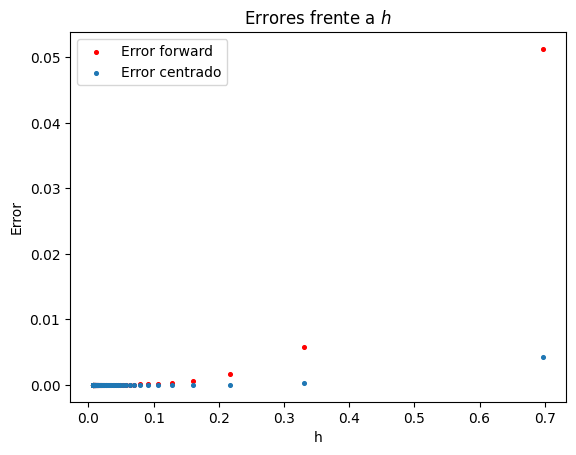

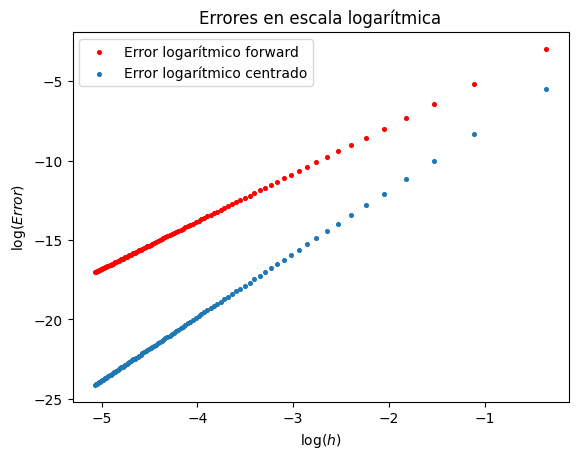

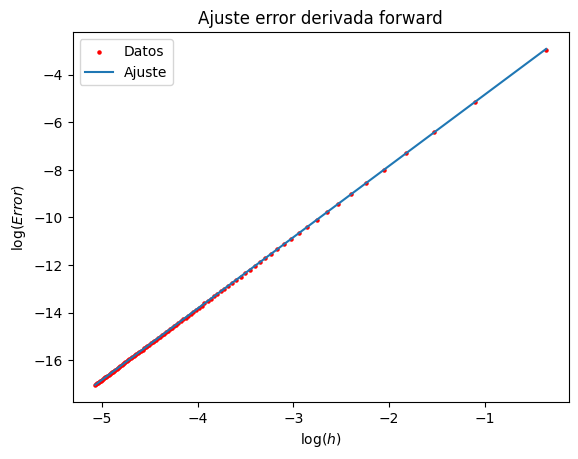

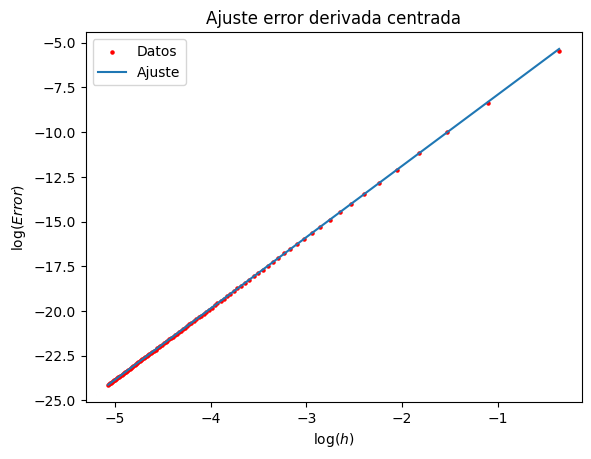

Los parámetros de la recta de ajuste de la derivada forward son [ 2.99958133 -1.83817665]
Los parámetros de la recta de ajuste de la derivada centrada son [ 3.98603836 -3.91630893]


In [116]:
'''PARTE 2- CALCULO DE ERRORES'''
def calculo_errores(n_h):
    '''INICIALIZAMOS UNA LISTA DE ERRORES PARA CADA DERIVADA, Y UNA LISTA DE SALTOS h'''
    error_f=[]
    error_c=[]
    h=[]
    '''UTILIZAMOS UN VECTOR FOR PARA MOVERNOS EN EL VECTOR QUE MODIFICA h'''
    for i in range (0,len(n_h)):
        '''EN CADA ITERACION AUMENTA EL NUMERO DE TIEMPOS, Y DISMINUYE h'''
        t=linspace(0,2*pi,int(n_h[i]))
        '''METEMOS h EN LA LISTA EN CADA ITERACION'''
        h.append(t[1]-t[0])
        '''EJECUTAMOS LOS PROGRAMAS DE DERIVADAS'''
        f=evaluar_coseno(t)
        derivada_f=derivada_forward(t,f)
        derivada_c=derivada_centrada(t,f)
        derivada_v=evaluar__menos_seno(t)
        '''CALCULAMOS LOS ERRORES COMO LA MEDIA DEL ERROR ABSOLUTO, EN CADA h'''
        error_f.append(mean(abs(derivada_f-derivada_v)))
        error_c.append(mean(abs(derivada_c-derivada_v)))
    '''PINTAMOS LOS ERRORES FRENTE A h'''
    plt.scatter(h,error_f,label='Error forward',color='red',s=7)
    plt.scatter(h,error_c,label='Error centrado',s=7)
    plt.legend()
    plt.xlabel('h')
    plt.ylabel('Error')
    plt.title('Errores frente a $h$')
    plt.show()
    '''PINTAMOS LOS ERRORES FRENTE A h, AMBOS EN ESCALA LOGARITMICA'''
    plt.scatter(log(h),log(error_f),label='Error logarítmico forward',color='red',s=7)
    plt.scatter(log(h),log(error_c),label='Error logarítmico centrado',s=7)
    plt.legend()
    plt.xlabel('$\log(h)$')
    plt.ylabel('$\log(Error)$')
    plt.title('Errores en escala logarítmica')
    plt.show()
    '''REALIZAMOS UN AJUSTE LINEAL DEL LOGARITMO TOMADO'''
    p_f=polyfit(log(h),log(error_f),1)
    p_c=polyfit(log(h),log(error_c),1)
    ''' LO REPRESENTAMOS FRENTE A LOS DATOS'''
    plt.scatter(log(h),log(error_f),color='red',s=5,label='Datos')
    plt.plot(log(h), log(h)*p_f[0]+p_f[1],label='Ajuste')
    plt.legend()
    plt.title('Ajuste error derivada forward')
    plt.xlabel('$\log(h)$')
    plt.ylabel('$\log(Error)$')
    plt.show()
    '''LO HACEMOS TAMBIEN CON LA DERIVADA CENTRADA '''
    plt.scatter(log(h),log(error_c),color='red',s=5,label='Datos')
    plt.plot(log(h), log(h)*p_c[0]+p_c[1],label='Ajuste')
    plt.legend()
    plt.title('Ajuste error derivada centrada')
    plt.xlabel('$\log(h)$')
    plt.ylabel('$\log(Error)$')
    plt.show()
    return p_f,p_c
    
def main():
    '''CREAMOS EL VECTOR QUE NOS VA A DETERMINAR EL NUMERO DE ELEMENTOS DEL VECTOR TIEMPO,
    Y h COMO CONSECUENCIA'''
    n_h=linspace(10,1000,100)
    p_f,p_c=calculo_errores(n_h) 
    print('Los parámetros de la recta de ajuste de la derivada forward son '+str(p_f))
    print('Los parámetros de la recta de ajuste de la derivada centrada son '+str(p_c))
if __name__ == '__main__':
	main()     
  


    



## EJERCICIO 3

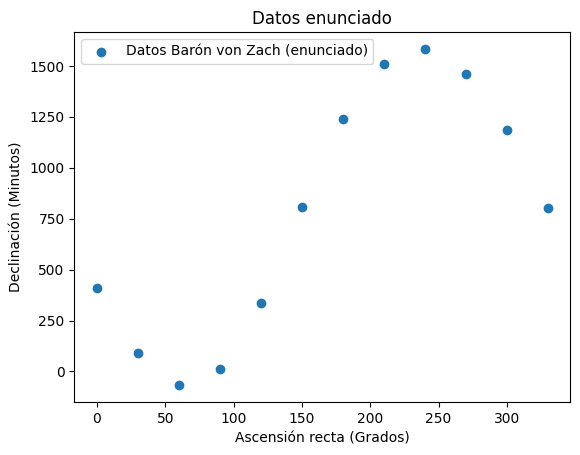

Los coeficientes complejos de la serie de Fourier son [ 7.80583333e+02+0.00000000e+00j -2.05507183e+02+3.60113946e+02j
  2.17083333e+01+1.08253175e+00j -2.16666667e+00-2.75000000e+00j
 -5.41666667e-01+5.05181486e-01j  1.73850033e-01+1.36053580e-01j
  8.33333333e-02+0.00000000e+00j]
Los coeficientes cosenoidales son [ 1.56116667e+03+0.j -4.11014367e+02+0.j  4.34166667e+01+0.j
 -4.33333333e+00+0.j -1.08333333e+00+0.j  3.47700065e-01+0.j
  1.66666667e-01+0.j]
Los coeficientes sinusoidales son [-7.20227893e+02+0.j -2.16506351e+00+0.j  5.50000000e+00+0.j
 -1.01036297e+00+0.j -2.72107160e-01+0.j  0.00000000e+00+0.j]


In [118]:
# APARTADO F

'''DEFINIMOS LA FUNCIÓN QUE NOS VA A PERMITIR CALCULAR LOS COEFICIENTES DE FOURIER.
SU ÚNICO ARGUMENTO DE ENTRADA ES UN VECTOR DE IMÁGENES UNIFORMEMENTE DISTRIBUIDAS 
EN EL PERIODO.'''
def coeficientes_fourier(delta):
    '''LA FUNCIÓN rFFT NOS DA LOS COEFICIENTES COMPLEJOS DE FOURIER'''
    c_i = fft.rfft(delta, norm='forward')
    '''LOS COEFICIENTES COSENOIDALES {a_i}, Y SINUSOIDALES {b_i} LOS OBTENEMOS MEDIANTE SIMPLES
    RELACIONES ALGEBRAICAS, USANDO QUE $c_i=\frac{a_i-ib_i}{2}$'''
    a_i=c_i+conj(c_i)
    b_i=(c_i-conj(c_i))*1j
    '''ELIMINAMOS b_i[0], PUES SABEMOS QUE c_i[0]=a_i[0/2], e.d. $c_i[0]\in\mathbb{R}$'''
    b_i=b_i[1:]
    '''HACEMOS QUE LA FUNCIÓN NOS DEVUELVA LOS COEFICIENTES'''
    return a_i,b_i,c_i
def main():
    '''PRIMERO DEFINIMOS LOS VECTORES ALPHA Y DELTA QUE VAMOS A UTILIZAR'''
    alpha=linspace(0,330,12)
    delta=array([408,89,-66,10,338,807,1238,1511,1583,1462,1183,804])
    '''AHORA REPRESENTAMOS LOS PUNTOS OBTENIDOS CON LA FUNCIÓN SCATTER PARA POSTEIORMENTE
    COMPARARLO CON LOS RESULTADOS QUE OBTENGAMOS'''
    plt.scatter(alpha,delta,label='Datos Barón von Zach (enunciado)')
    plt.xlabel('Ascensión recta (Grados)')
    plt.ylabel('Declinación (Minutos)')
    plt.legend()
    plt.title('Datos enunciado')
    plt.show()
    a_i, b_i, c_i = coeficientes_fourier(delta)
    '''AHORA EXOPONEMOS LOS COEFICIENTES DE FOURIER OBTENIDOS'''
    print('Los coeficientes complejos de la serie de Fourier son '+ str(c_i))
    print('Los coeficientes cosenoidales son '+str(a_i))
    print('Los coeficientes sinusoidales son '+str(b_i))
    return a_i,b_i,c_i
if __name__ == '__main__':
	main()


In [106]:
# APARTADO G
'''AHORA CONSIDERAMOS LOS COEFICIENTES DE FOURIER OBTENIDOS EN EL APARTADO ANTERIOR Y LOS REDONDEAMOS
HASTA EL SEGUNDO TERMINO'''   
a_i,b_i,c_i=main()
b_i=around(b_i,2)
a_i=around(a_i,2)
c_i=around(c_i,2)
'''AHORA SIMPLEMENTE UTILIZAMOS LA DEFINICIÓN DE LA SERIE DE FOURIER Y LA EXPRESAMOS:'''
print('Los coeficientes cosenoidales son :'+str(a_i))
print('Los coeficientes sinusoidales son :'+str(b_i))

Los coeficientes cosenoidales son :[ 1.56117e+03+0.j -4.11010e+02+0.j  4.34200e+01+0.j -4.33000e+00+0.j
 -1.08000e+00+0.j  3.50000e-01+0.j  1.70000e-01+0.j]
Los coeficientes sinusoidales son :[-7.2023e+02+0.j -2.1700e+00+0.j  5.5000e+00+0.j -1.0100e+00+0.j
 -2.7000e-01+0.j  0.0000e+00+0.j]


###### $f(\alpha)=\frac{1561.17}{2}-411.01\cos(\frac{\pi}{180}\alpha)-720.23\sin(\frac{\pi}{180}\alpha)+43.42\cos(\frac{\pi}{90}\alpha)-2.17\sin(\frac{\pi}{90}\alpha)-4.33\cos(\frac{\pi}{60}\alpha)+5.50\sin(\frac{\pi}{60}\alpha)-1.08\cos(\frac{\pi}{45}\alpha)-1.01\sin(\frac{\pi}{45}\alpha)+0.35\cos(\frac{\pi}{36}\alpha)-0.27\sin(\frac{\pi}{36}\alpha)+0.17\cos(\frac{\pi}{30}\alpha)+0\sin(\frac{\pi}{30}\alpha)$


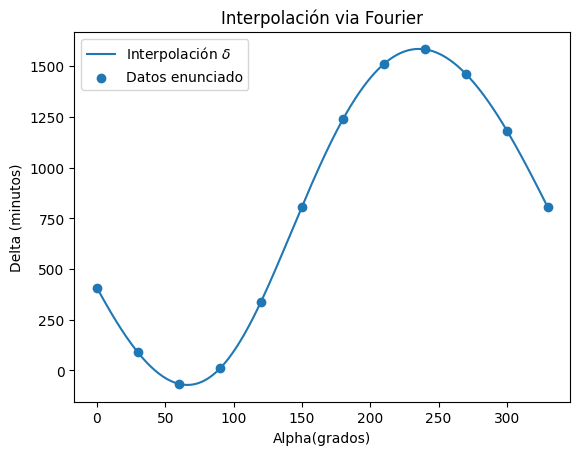

In [119]:
#APARTADO H
'''UTILIZAMOS UNA FUNCION QUE TIENE COMO ARGUMENTOS DE ENTRADA
UN VECTOR DE TIEMPOS (EN ESTE CASO GRADOS), LOS COEFICIENTES 
DE LA SERIE DE FOURIER OBTENIDOS ANTERIORMENTE, Y EL PERIODO
DE LA FUNCION DE LA QUE TENEMOS QUE INTERPOLAR.'''
def evaluar_delta(alpha,c_i,T):
    evalu=c_i[0]*ones(len(alpha))
    for i in range(1,len(c_i)):
        evalu=evalu+c_i[i]*exp(2*pi*1j*i*alpha/T)+conj(c_i[i])*exp(2*pi*1j*(-i)*alpha/T)
    return evalu

def main():
    alpha=linspace(0,330,12)
    delta=array([408,89,-66,10,338,807,1238,1511,1583,1462,1183,804])
    alpha_largo=linspace(0,330,1000)
    T=360
    evalu=evaluar_delta(alpha_largo,c_i,T)
    '''PRINTEAMOS LOS DATOS DEL ENUNCIADO JUNTO CON LA INTERPOLACION
    CON MUCHOS DATOS PARA GARANTIZAR LA SUAVIDAD DE LA CURVA'''
    plt.plot(alpha_largo,evalu,label='Interpolación $\delta$')
    plt.scatter(alpha,delta,label='Datos enunciado')
    plt.xlabel('Alpha(grados)')
    plt.ylabel('Delta (minutos)')
    plt.legend()
    plt.title('Interpolación via Fourier')
    plt.show()
if __name__ == '__main__':
	main()

La interpolación de la función a 45 grados es [-13.49197083+0.j]


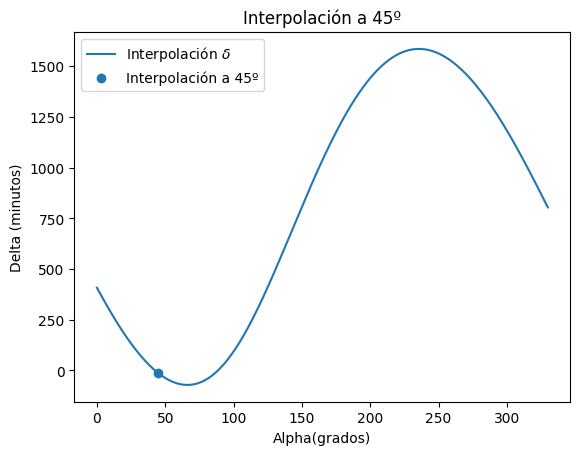

In [120]:
#APARTADO I 
'''PARA CALCULAR EL VALOR DE LA DECLINACION A 45º SIMPLEMENTE
TENEMOS QUE UTILIZAR LA FUNCIÓN CREADA EN EL APARTADO 
ANTERIOR Y SUSTITUIR POR EL VALOR INDICADO'''
def main():
    alpha_largo=linspace(0,330,1000)
    T=360
    evalu=evaluar_delta(alpha_largo,c_i,T)
    f_45=evaluar_delta(array([45]),c_i,T)
    '''PRINTEAMOS LOS DATOS DEL ENUNCIADO JUNTO CON LA INTERPOLACION
    CON MUCHOS DATOS PARA GARANTIZAR LA SUAVIDAD DE LA CURVA'''
    plt.plot(alpha_largo,evalu,label='Interpolación $\delta$')
    plt.scatter(45,f_45,label='Interpolación a 45º')
    print('La interpolación de la función a 45 grados es '+str(f_45))
    plt.xlabel('Alpha(grados)')
    plt.ylabel('Delta (minutos)')
    plt.legend()
    plt.title('Interpolación a 45º')
    plt.show()
if __name__ == '__main__':
	main()

El valor de la derivada en 45º es [-5.24831183+0.j]


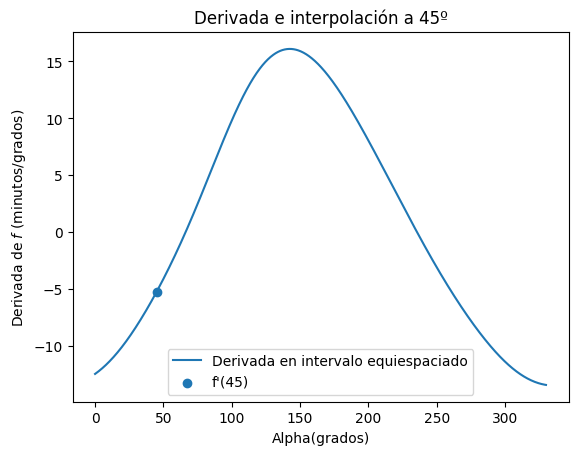

In [121]:
#APARTADO J
'''CREAMOS LA FUNCION DERIVADA CON 3 ARGUMENTOS DE ENTRADA, EL VECTOR DE GRADOS, LOS COEFICIENTES
DE FOURIER Y EL PERIODO DE LA FUNCION.'''
def evaluar_delta_prima(alpha,c_i,T):
    '''CREAMOS UN VECTOR DE CEROS PARA INICIALIZAR EL VECTOR EVALUACION DE LA DERIVADA'''
    evalu=zeros(len(alpha))
    '''EMPEZAMOS EL BUCLE FOR EN EL PRIMER TERMINO PORQUE LA DERIVADA DE LAS CONSTANTES ES NULA'''
    for i in range(1,len(c_i)):
        evalu=evalu+c_i[i]*(2*pi*1j*i/T)*exp(2*pi*1j*i*alpha/T)+conj(c_i[i])*(2*pi*1j*(-i)/T)*exp(2*pi*1j*(-i)*alpha/T)
    return evalu
def main():
    '''CREAMOS UN VECTOR DE TIEMPOS QUE NOS PERMITA OBTENER UNA VERSION RAZONABLEMENTE SUAVE
    DE LA FUNCION'''
    alpha=linspace(0,330,1000)
    f_prima=evaluar_delta_prima(alpha,c_i,360)
    plt.plot(alpha,f_prima,label='Derivada en intervalo equiespaciado')
    f_prima_45=evaluar_delta_prima(array([45]),c_i,360)
    '''PRINTEAMOS EL VALOR DE LA FUNCION EN EL PUNTO DE INTERES'''
    print('El valor de la derivada en 45º es '+str(f_prima_45))
    plt.scatter([45],f_prima_45,label="f'(45)")
    plt.xlabel('Alpha(grados)')
    plt.ylabel('Derivada de $f$ (minutos/grados)')
    plt.legend()
    plt. title('Derivada e interpolación a 45º')
    plt.show()
if __name__ == '__main__':
	main()
